In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from numpy import argmax
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation, Convolution2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential

In [2]:
image_size = (128,128)
batch_size = 50

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/home/karol/python_projekty/cv2/sudoku/data/train",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/home/karol/python_projekty/cv2/sudoku/data/test",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 8000 files belonging to 10 classes.
Using 6400 files for training.
Found 2000 files belonging to 10 classes.
Using 400 files for validation.


2022-02-01 10:53:58.558952: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-01 10:53:58.587589: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-01 10:53:58.587782: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-01 10:53:58.588486: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
data_augmentation = keras.Sequential(
    [
        layers.RandomRotation(0.08),
    ]
)

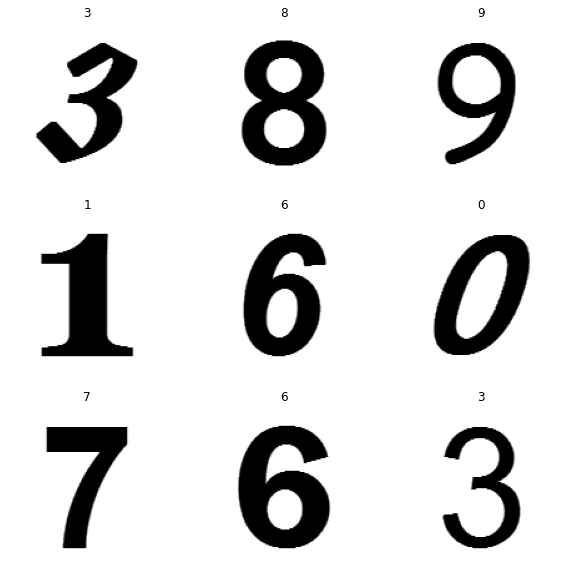

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
plt.show()

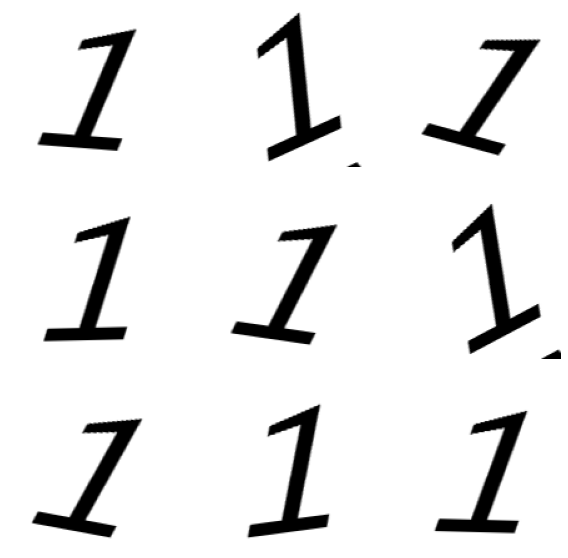

In [5]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

plt.show()

In [6]:
layers = \
  [ Convolution2D(128, 3, 3, input_shape=(128, 128, 3), activation='relu')
  , Convolution2D(256, 2, 1, activation='relu')
  , Convolution2D(512, 2, 1, activation='relu')
  , MaxPooling2D(pool_size=(2, 2))
  , Flatten()
  , Dense(1024, activation='relu')
  , Dropout(0.5)
  , Dense(512, activation='relu')
  , Dropout(0.5)
  , Dense(10)
  , Activation('softmax')
  ]

model = Sequential()
for layer in layers:
    model.add(layer)

In [7]:
callbacks = [
    keras.callbacks.ModelCheckpoint("/home/karol/python_projekty/cv2/sudoku/models/save_at_{epoch}.h5"),
]
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_ds, epochs=12, batch_size=128, validation_data=val_ds, callbacks=callbacks)

Epoch 1/12


2022-02-01 10:54:00.740929: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8300
2022-02-01 10:54:01.280231: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.25GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-02-01 10:54:01.280261: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.25GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


  1/128 [..............................] - ETA: 5:03 - loss: 46.3711 - accuracy: 0.0400

2022-02-01 10:54:02.145887: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.45GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-02-01 10:54:02.145924: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.45GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-02-01 10:54:02.211421: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.13GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-02-01 10:54:02.211462: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Alloc

128/128 [==============================] - 26s 184ms/step - loss: 21.9935 - accuracy: 0.8083 - val_loss: 0.1449 - val_accuracy: 0.9525
Epoch 2/12
128/128 [==============================] - 23s 180ms/step - loss: 0.2814 - accuracy: 0.9320 - val_loss: 0.1141 - val_accuracy: 0.9625
Epoch 3/12
128/128 [==============================] - 23s 182ms/step - loss: 0.1192 - accuracy: 0.9631 - val_loss: 0.1042 - val_accuracy: 0.9650
Epoch 4/12
128/128 [==============================] - 23s 181ms/step - loss: 0.1307 - accuracy: 0.9644 - val_loss: 0.1638 - val_accuracy: 0.9625
Epoch 5/12
128/128 [==============================] - 24s 189ms/step - loss: 0.1100 - accuracy: 0.9694 - val_loss: 0.1340 - val_accuracy: 0.9600
Epoch 6/12
128/128 [==============================] - 24s 189ms/step - loss: 0.1204 - accuracy: 0.9656 - val_loss: 0.1136 - val_accuracy: 0.9675
Epoch 7/12
128/128 [==============================] - 24s 189ms/step - loss: 0.0974 - accuracy: 0.9733 - val_loss: 0.0829 - val_accuracy: 0.

In [8]:
img = keras.preprocessing.image.load_img(
    "/home/karol/python_projekty/cv2/sudoku/data/test/2/img003-00005.png", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
print(argmax(predictions))

2


2022-02-01 10:58:46.428122: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.05GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-02-01 10:58:46.428158: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.05GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
